### **Objective - Analysis of Covid Data**

In [94]:
import numpy as np
import pandas as pd

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [96]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [97]:
df=pd.read_csv('/drive/My Drive/CSV/transformed_data.csv')

In [98]:
df

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


In [100]:
df.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


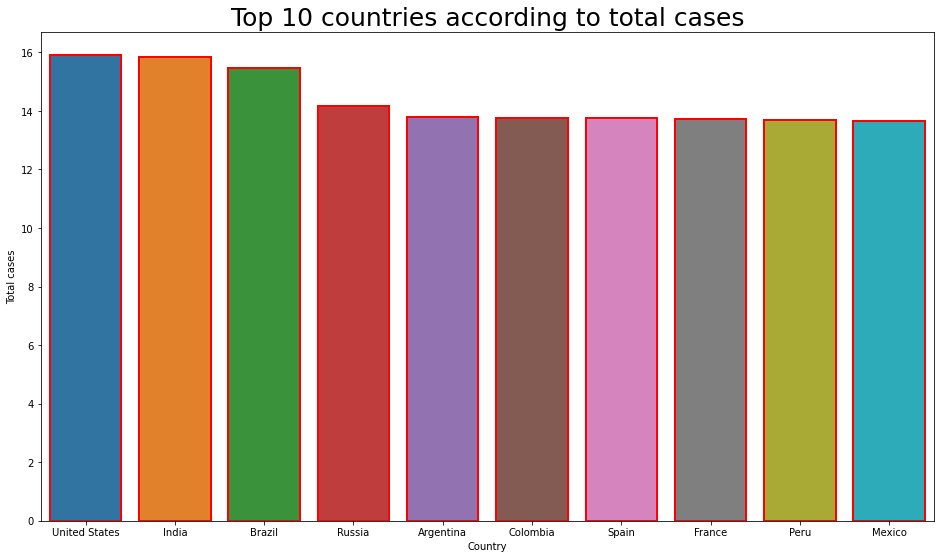

In [101]:
# Top 10 countries according to total cases

top_10_total_cases_countries=df.groupby(by='COUNTRY').max()[['TC','DATE']].sort_values(by=['TC'], ascending=False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title('Top 10 countries according to total cases', size=25)
ax = sns.barplot(data=top_10_total_cases_countries.iloc[:10], y='TC', x='COUNTRY', linewidth=2, edgecolor='red' )
plt.xlabel('Country')
plt.ylabel('Total cases')
plt.show()

Text(0.5, 1.0, 'Top 5 affected countries according to total cases')

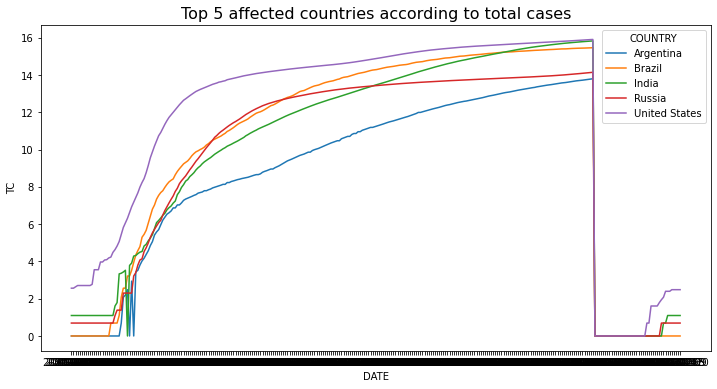

In [102]:
# Growth Trend of Total Cases

fig = plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df[df['COUNTRY'].isin(['United States','India','Brazil','Russia','Argentina'])], 
                                  x='DATE', y='TC', hue = 'COUNTRY') 

ax.set_title('Top 5 affected countries according to total cases', size=16)

Text(0.5, 1.0, 'Top 5 affected countries according to total cases (GDP)')

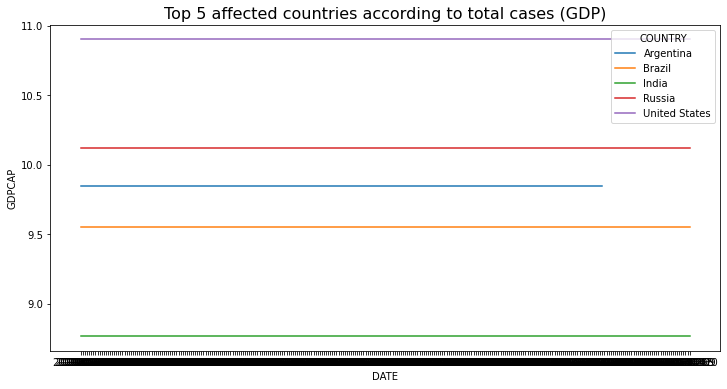

In [111]:
# GDP Trend

fig = plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df[df['COUNTRY'].isin(['United States','India','Brazil','Russia','Argentina'])], 
                                  x='DATE', y='GDPCAP', hue = 'COUNTRY') 

ax.set_title('Top 5 affected countries according to total cases (GDP)', size=16)

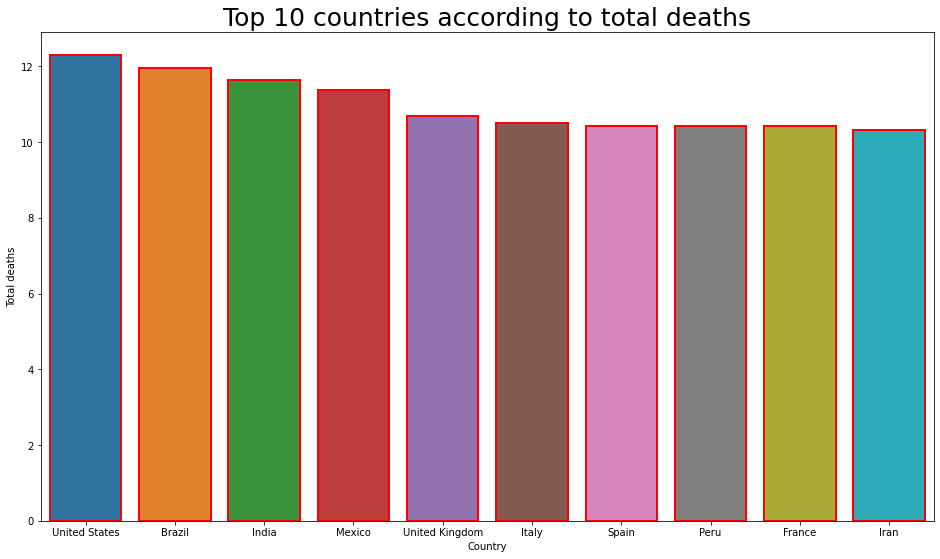

In [103]:
# Top 10 countries according to total deaths

top_10_total_deaths_countries=df.groupby(by='COUNTRY').max()[['TD','DATE']].sort_values(by=['TD'], ascending=False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title('Top 10 countries according to total deaths', size=25)
ax = sns.barplot(data=top_10_total_deaths_countries.iloc[:10], y='TD', x='COUNTRY', linewidth=2, edgecolor='red')
plt.xlabel('Country')
plt.ylabel('Total deaths')
plt.show()

Text(0.5, 1.0, 'Top 5 affected countries according to total deaths')

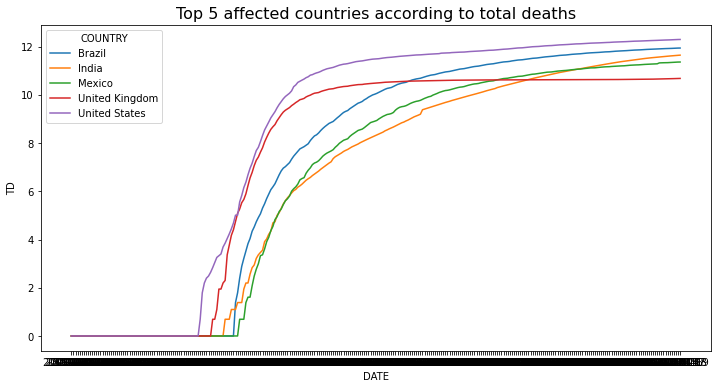

In [104]:
# Growth Trend of Total Deaths

fig = plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df[df['COUNTRY'].isin(['United States','Brazil','India','Mexico','United Kingdom'])], 
                                  x='DATE', y='TD', hue = 'COUNTRY') 

ax.set_title('Top 5 affected countries according to total deaths', size=16)

In [105]:
# total deaths to total cases percentage

df['TD/TC(%)']=df['TD']*100/df['TC']
df.tail()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,TD/TC(%)
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491,60.511324
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491,60.494644
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491,60.474695
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491,60.465576
50417,ZWE,Zimbabwe,2020-10-19,0.535,9.005405,5.442418,4.341855,16.514381,7.549491,60.435013


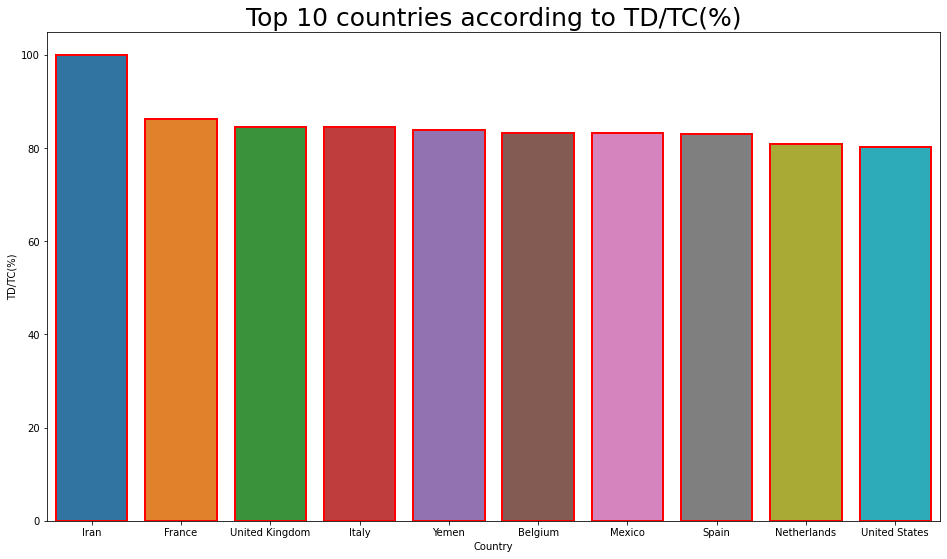

In [106]:
# Top 10 countries according to TD/TC(%)

top_10_countries=df.groupby(by='COUNTRY').max()[['TD/TC(%)','DATE']].sort_values(by=['TD/TC(%)'], ascending=False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title('Top 10 countries according to TD/TC(%)', size=25)
ax = sns.barplot(data=top_10_countries.iloc[:10], y='TD/TC(%)', x='COUNTRY', linewidth=2, edgecolor='red')
plt.xlabel('Country')
plt.ylabel('TD/TC(%)')
plt.show()

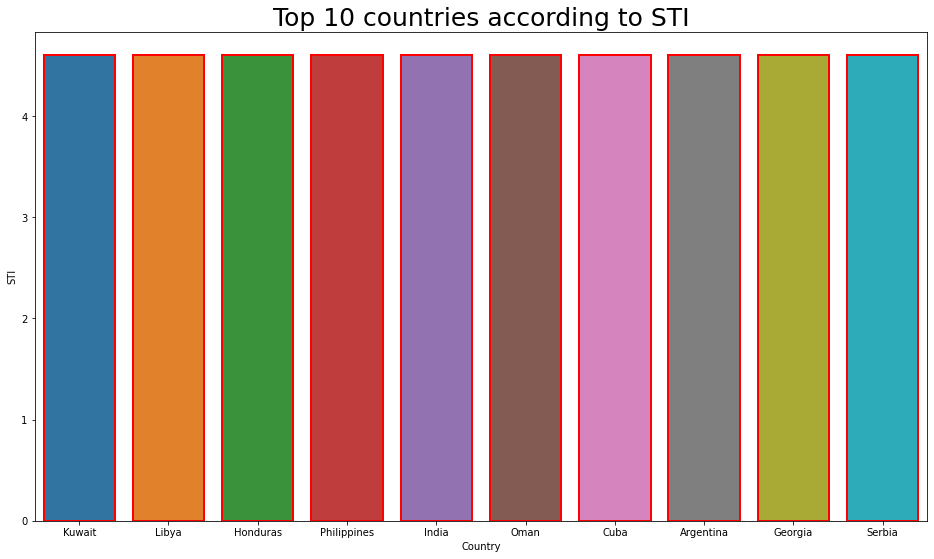

In [107]:
# Top 10 countries according to STI

top_10_sti_countries=df.groupby(by='COUNTRY').max()[['STI','DATE']].sort_values(by=['STI'], ascending=False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title('Top 10 countries according to STI', size=25)
ax = sns.barplot(data=top_10_sti_countries.iloc[:10], y='STI', x='COUNTRY', linewidth=2, edgecolor='red')
plt.xlabel('Country')
plt.ylabel('STI')
plt.show()

Text(0.5, 1.0, 'Top 5 highest STI countries according to total cases')

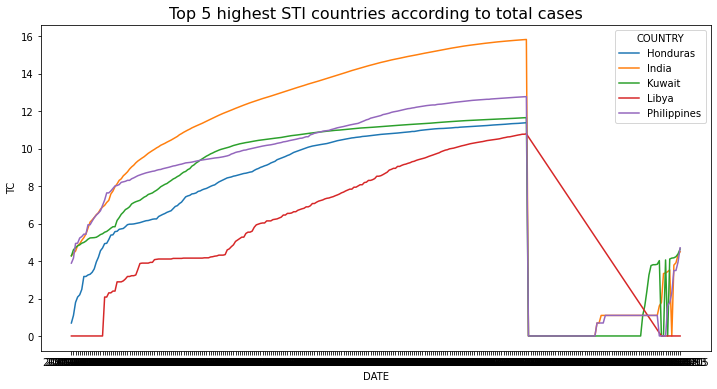

In [109]:
# Growth Trend of Total Cases in countries where STI is the highest

fig = plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df[df['COUNTRY'].isin(['Kuwait','Libya','Honduras','Philippines','India'])], 
                                  x='DATE', y='TC', hue = 'COUNTRY') 

ax.set_title('Top 5 highest STI countries according to total cases', size=16)

In [113]:
# total deaths to total population percentage

df['TD/POP(%)']=df['TD']*100/df['POP']
df.tail()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,TD/TC(%),TD/POP(%)
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491,60.511324,32.955627
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491,60.494644,32.955627
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491,60.474695,32.955627
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491,60.465576,32.955627
50417,ZWE,Zimbabwe,2020-10-19,0.535,9.005405,5.442418,4.341855,16.514381,7.549491,60.435013,32.955627


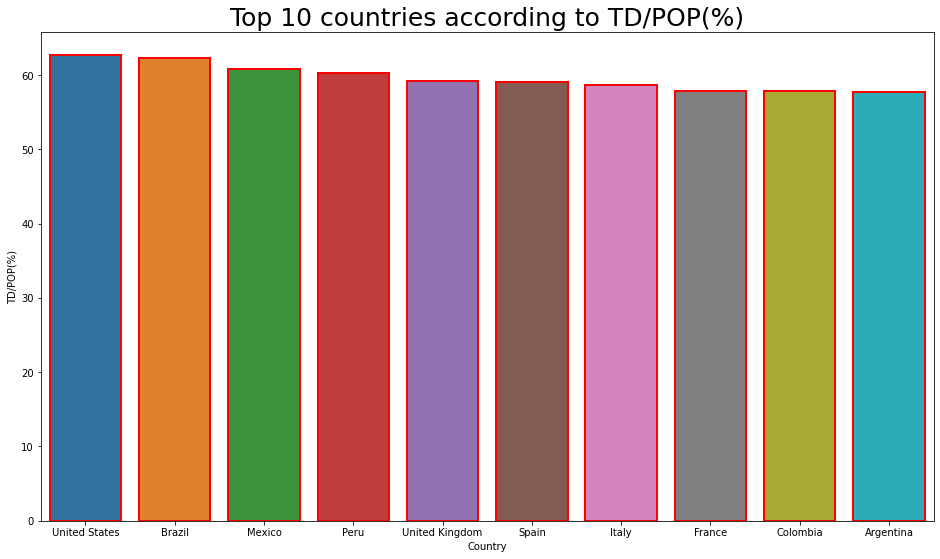

In [114]:
# Top 10 countries according to TD/POP(%)

top_10_TDPOP_countries=df.groupby(by='COUNTRY').max()[['TD/POP(%)','DATE']].sort_values(by=['TD/POP(%)'], ascending=False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title('Top 10 countries according to TD/POP(%)', size=25)
ax = sns.barplot(data=top_10_TDPOP_countries.iloc[:10], y='TD/POP(%)', x='COUNTRY', linewidth=2, edgecolor='red')
plt.xlabel('Country')
plt.ylabel('TD/POP(%)')
plt.show()